In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scanpy
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 27.6 MB/s 
     |████████████████████████████████| 9.4 MB 58.4 MB/s 
     |████████████████████████████████| 88 kB 8.5 MB/s 
     |████████████████████████████████| 96 kB 6.5 MB/s 
     |████████████████████████████████| 965 kB 53.4 MB/s 
     |████████████████████████████████| 295 kB 77.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.3 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=14bca6c0d7cb7b757a11adf089f559875be81edb44905bb381846d58f5d97c60
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=260c282e024aab06a300eca7d15a24f25a0fe6f48c75b03ce37ed80f79297dca
  Stored in direct

Found existing installation: matplotlib 3.6.2
Uninstalling matplotlib-3.6.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [ ]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load datasets
train_data = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/SAD2_project1/SAD2022Z_Project1_GEX_train.h5ad')
test_data = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/SAD2_project1/SAD2022Z_Project1_GEX_test.h5ad')

In [ ]:
test_data.var

,feature_types,gene_id,highly_variable,highly_variable_rank,means,variances,variances_norm
HES4,GEX,ENSG00000188290,True,407.0,0.038632,0.112988,2.287162
ISG15,GEX,ENSG00000187608,True,628.0,0.522363,2.471129,1.863295
AGRN,GEX,ENSG00000188157,True,4697.0,0.004830,0.005228,0.988762
TNFRSF18,GEX,ENSG00000186891,True,1523.0,0.034688,0.056884,1.299083
TNFRSF4,GEX,ENSG00000186827,True,1112.0,0.042809,0.080751,1.457357
...,...,...,...,...,...,...,...
VBP1,GEX,ENSG00000155959,True,1479.0,0.342906,0.927429,1.311264
CLIC2,GEX,ENSG00000155962,True,1997.0,0.052924,0.083694,1.198042
F8A3,GEX,ENSG00000277150,True,3666.0,0.010902,0.013176,1.030908
MT-CO3,GEX,ENSG00000198938,True,3683.0,47.371999,5841.701711,1.029735


In [ ]:
test_X_df = test_data.X.toarray()
pd.DataFrame(test_X_df)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.564087,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.648703,0.412176,0.824352,0.824352,0.824352,0.0,0.0,39.981049,0.0
2,0.000000,1.169716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.169716,0.000000,0.000000,0.0,0.0,80.710419,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.720734,0.000000,0.0,0.0,20.180548,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.518451,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18047,1.933894,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,201.124969,0.0
18048,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.948277,0.000000,0.000000,0.000000,0.948277,0.0,0.0,44.569019,0.0
18049,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.331615,0.665808,0.665808,0.0,0.0,71.907234,0.0
18050,0.000000,3.013459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.506729,0.000000,0.000000,0.000000,0.000000,0.0,0.0,55.748989,0.0


In [ ]:
train_data

AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'

In [ ]:
# Report how many observations and variables the training and test data sets contain
n_obs = [train_data.n_obs, test_data.n_obs]
n_vars = [train_data.n_vars, test_data.n_vars]
summary1 = pd.DataFrame(zip(n_obs, n_vars), index=['Training dataset', 'Test dataset'], columns=['Number of observations', 'Number of variables'])
summary1

,Number of observations,Number of variables
Training dataset,72208,5000
Test dataset,18052,5000


In [ ]:
# Access the adata.X object, which contains a matrix of counts which has
# been already preprocessed, and the adata.layers[’counts’] object, which
# contains raw data. Plot histograms of both the raw data and the processed
# data. Pay attention to the X-axis and the range of values spanned by the data
train_X_df = train_data.X.toarray()
test_X_df = test_data.X.toarray()
train_raw_df = train_data.layers['counts'].toarray()
test_raw_df = test_data.layers['counts'].toarray()

In [ ]:
train_X_tohist = train_X_df.reshape(-1)
test_X_tohist = test_X_df.reshape(-1)
train_raw_tohist = train_raw_df.reshape(-1)
test_raw_tohist = test_raw_df.reshape(-1)

In [ ]:
mins = [train_X_tohist.min(), train_raw_tohist.min(), test_X_tohist.min(), test_raw_tohist.min()]
maxs = [train_X_tohist.max(), train_raw_tohist.max(), test_X_tohist.max(), test_raw_tohist.max()]
medians = [np.median(train_X_tohist), np.median(train_raw_tohist), np.median(test_X_tohist), np.median(test_raw_tohist)]
means = [train_X_tohist.mean(), train_raw_tohist.mean(), test_X_tohist.mean(), test_raw_tohist.mean()]
summary2 = pd.DataFrame(zip(mins, maxs, means, medians), index=['preprocessed train data', 'raw trein data', 'preprocessed test data', 'raw test data'], columns=['min', 'max', 'mean', 'median'])
summary2

,min,max,mean,median
preprocessed train data,0.0,21078940.0,3.427410,0.0
raw trein data,0.0,35451.0,0.442107,0.0
preprocessed test data,0.0,21078940.0,3.657701,0.0
raw test data,0.0,35451.0,0.447278,0.0


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0,0].hist(train_X_tohist, bins=[i for i in np.arange(0, 10.5, 0.5)], ec="pink", fc="blue", alpha=0.5)
axes[0,0].set_title('Preprocessed training data')
axes[0,0].set_xlabel('Preprocessed counts')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(train_raw_tohist, bins=[i for i in np.arange(0, 11, 1)], ec="pink", fc="blue", alpha=0.5)
axes[0,1].set_title('Raw training data')
axes[0,1].set_xlabel('Raw counts')
axes[0,1].set_ylabel('Frequency')

axes[1,0].hist(test_X_tohist, bins=[i for i in np.arange(0, 10.5, 0.5)], ec="pink", fc="blue", alpha=0.5)
axes[1,0].set_title('Preprocessed test data')
axes[1,0].set_xlabel('Preprocessed counts')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(test_raw_tohist, bins=[i for i in np.arange(0, 11, 1)], ec="pink", fc="blue", alpha=0.5)
axes[1,1].set_title('Raw test data')
axes[1,1].set_xlabel('Raw counts')
axes[1,1].set_ylabel('Frequency')

plt.show()

(c) Explain what kind of preprocessing has been applied to the preprocessed matrix. 

raw number divided by GEX_size_factors, where GEX_size_factors is a cell-specific scaling factor

In [ ]:
# (d) (3 pt.) Remove zeroes from both the raw and the processed matrices. Plot histograms of both modified data sets.
train_X_tohist = train_X_tohist[train_X_tohist != 0 ]
test_X_tohist = test_X_tohist[test_X_tohist != 0 ]
train_raw_tohist = train_raw_tohist[train_raw_tohist != 0 ]
test_raw_tohist = test_raw_tohist[test_raw_tohist != 0]

mins = [train_X_tohist.min(), train_raw_tohist.min(), test_X_tohist.min(), test_raw_tohist.min()]
maxs = [train_X_tohist.max(), train_raw_tohist.max(), test_X_tohist.max(), test_raw_tohist.max()]
medians = [np.median(train_X_tohist), np.median(train_raw_tohist), np.median(test_X_tohist), np.median(test_raw_tohist)]
means = [train_X_tohist.mean(), train_raw_tohist.mean(), test_X_tohist.mean(), test_raw_tohist.mean()]
summary3 = pd.DataFrame(zip(mins, maxs, means, medians), index=['preprocessed train data', 'raw trein data', 'preprocessed test data', 'raw test data'], columns=['min', 'max', 'mean', 'median'])
summary3

,min,max,mean,median
preprocessed train data,0.104287,21078940.0,38.395397,1.363098
raw trein data,1.000000,35451.0,4.952696,1.000000
preprocessed test data,0.118915,21078940.0,40.806011,1.353503
raw test data,1.000000,35451.0,4.989901,1.000000


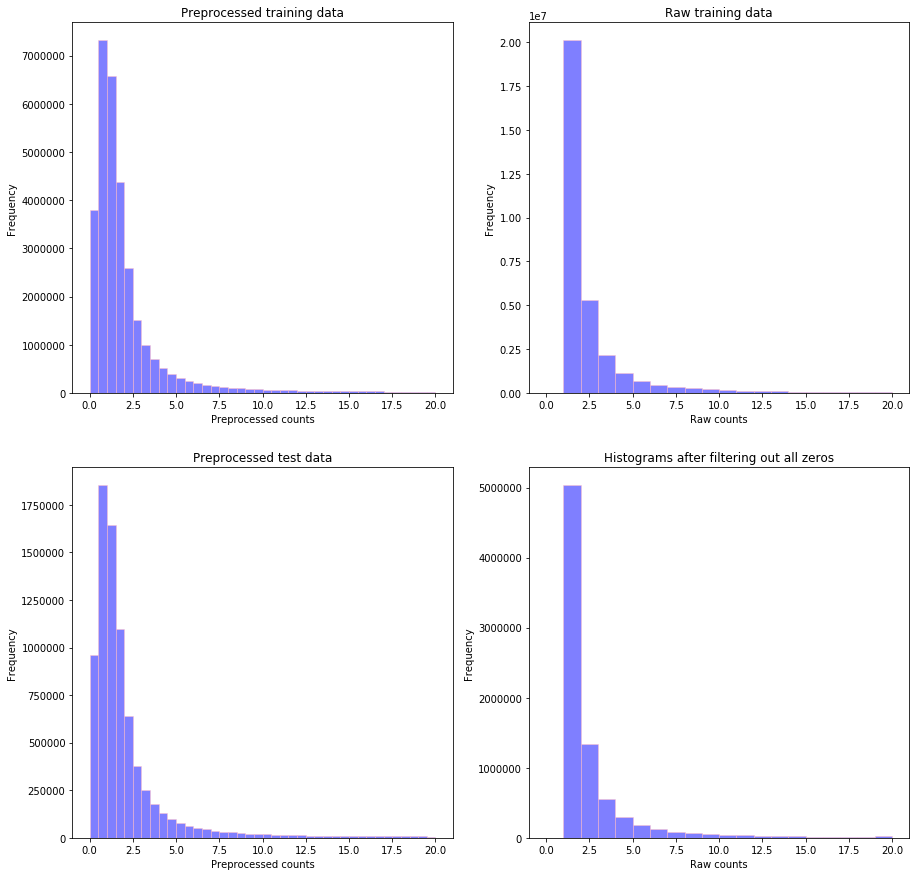

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0,0].hist(train_X_tohist, bins=[i for i in np.arange(0, 20.5, 0.5)], ec="pink", fc="blue", alpha=0.5)
axes[0,0].set_title('Preprocessed training data')
axes[0,0].set_xlabel('Preprocessed counts')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(train_raw_tohist, bins=[i for i in np.arange(0, 21, 1)], ec="pink", fc="blue", alpha=0.5)
axes[0,1].set_title('Raw training data')
axes[0,1].set_xlabel('Raw counts')
axes[0,1].set_ylabel('Frequency')

axes[1,0].hist(test_X_tohist, bins=[i for i in np.arange(0, 20.5, 0.5)], ec="pink", fc="blue", alpha=0.5)
axes[1,0].set_title('Preprocessed test data')
axes[1,0].set_xlabel('Preprocessed counts')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(test_raw_tohist, bins=[i for i in np.arange(0, 21, 1)], ec="pink", fc="blue", alpha=0.5)
axes[1,1].set_title('Raw test data')
axes[1,1].set_xlabel('Raw counts')
axes[1,1].set_ylabel('Frequency')

plt.title('Histograms after filtering out all zeros')
plt.show()

(e) (5 pt.) Explain what is the distribution of the data. Explain what the abundance of zeroes means in this context? Tip: There is an biological explanation.

Distribution: Poisson distribution/Beta distribution

Abundace of zeros: usually gene expression is cell-specific. Większość genów, które analizujemy ulega ekspresji w niewielu typach analizowanych komórek, stąd wszechobecność zer.

In [ ]:
test_data.obs.columns
train_data.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
AGTTCCCAGCACCTGC-1-s3d1,948,5.113025,1.371097,G2M,139,2278.0,23.0,CD14+ Mono,s3d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CAGATTGCAAAGGCAC-1-s2d1,2323,4.077203,2.426149,S,91,1190.0,2.0,Erythroblast,s2d1,0.965441,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATGACAATTTCCT-1-s1d2,1952,7.838442,0.854908,G2M,123,4138.0,14.0,Naive CD20+ B IGKC+,s1d2,NaN,...,10886,35,28.6,B+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
TCATCCGCACTTGGCG-1-s2d5,1811,7.071157,1.387475,G2M,105,707.0,2.0,CD14+ Mono,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,iid_holdout
AGTGCCGGTCATCAGT-1-s2d5,796,4.107981,0.520903,S,96,945.0,4.0,NK,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTCATGAGGTTTACC-1-s3d7,1108,9.544659,0.616979,G2M,114,1140.0,7.0,CD14+ Mono,s3d7,NaN,...,11466,22,31.5,A+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
GTGAGCCTCGCAGATT-1-s2d1,2821,9.352348,3.336449,S,90,474.0,5.0,Lymph prog,s2d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATTTTCCATTGCC-1-s2d1,1810,2.792384,1.473857,S,95,1327.0,1.0,Erythroblast,s2d1,0.977025,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CGCATGGAGAACCCGA-1-s1d1,434,0.239860,0.039444,G2M,131,6829.0,9.0,Reticulocyte,s1d1,0.726435,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train


In [ ]:
# (f) (3 pt.) Access the adata.obs object. Explain what is the information contained
# in this data frame. Report the the number of patients, the number of labs, and
# the number of cell types in the data.
train_data_obs = train_data.obs
test_data_obs = test_data.obs

print(f'Number of patients: {len(test_data_obs["DonorID"].unique())}')
print(f'Number of labs: {len(test_data_obs["Site"].unique())}')
print(f'Number of cell types: {len(test_data_obs["cell_type"].unique())}')

print(f'Number of patients: {len(test_data_obs["DonorID"].unique())}')
print(f'Number of labs: {len(test_data_obs["Site"].unique())}')
print(f'Number of cell types: {len(test_data_obs["cell_type"].unique())}')

Number of patients: 9
Number of labs: 4
Number of cell types: 45
